# Adiabatic Temperature

```
Created for ME4443 @ LSU (Spring 2018).
```

In [1]:
# libraries used
%matplotlib notebook
import cantera as ct
import numpy as np
import csv

import matplotlib.pyplot as plt

### Input Parameters

In [2]:
# generic info
phi = 1.               # equivalence ratio 
psi = 3.76             # ratio of N2 to O2 in air (moles
pres = ct.one_atm      # pressure

# info specific to reactants (currently for stoichiometric METHANE)
fu = 'CH4'             # fuel species
o2_reac = 2.           # number of O2 moles in reactants

# info specific to products (currently for stoichiometric METHANE)
co2_prod = 1.          # number of CO2 moles in products
h2o_prod = 2.          # number of H2O moles in products
o2_prod = 0.           # number of O2 moles in products

# output data
T_lo = 298.            # lowest temperature in output
T_hi = 3000.           # highest temperature in output
n_points = 100          # temperature increment for output

In [3]:
# create temperature range
Ts = np.linspace(T_lo,T_hi,n_points)

# create a cantera object to work with
gas = ct.Solution('gri30.xml')

### Reactant Mixture

In [4]:
# string describing reactants
reac = '%s:%4.2f, O2:%4.2f, N2:%4.2f' % (fu,phi,o2_reac,psi*o2_reac)
print('\nReactant composition:')
print(reac)

# initialize variables to store results
u_reac = np.zeros(n_points)
h_reac = np.zeros(n_points)
s_reac = np.zeros(n_points)
g_reac = np.zeros(n_points)
cp_reac = np.zeros(n_points)
cv_reac = np.zeros(n_points)

# calculate results at different temperatures
for i,T in enumerate(Ts):
    gas.TPX = (T, pres, reac,)
    u_reac[i] = gas.int_energy_mass
    h_reac[i] = gas.enthalpy_mass
    s_reac[i] = gas.entropy_mass
    g_reac[i] = gas.gibbs_mass
    cv_reac[i] = gas.cv_mass
    cp_reac[i] = gas.cp_mass


Reactant composition:
CH4:1.00, O2:2.00, N2:7.52


### Product Mixture (Assumed)

In [5]:
# create (approximate) product composition
prod = 'CO2:%4.2f, H2O:%4.2f, O2:%4.2f, N2:%4.2f' % \
    (co2_prod,h2o_prod,o2_prod,o2_reac*3.76,)
print('\nAssumed product composition:')
print(prod)

# initialize variables to store results
u_prod = np.zeros(n_points)
h_prod = np.zeros(n_points)

# calculate results at different temperatures
for i, T in enumerate(Ts):
    gas.TPX = (T, pres, prod,)
    u_prod[i] = gas.int_energy_mass
    h_prod[i] = gas.enthalpy_mass


Assumed product composition:
CO2:1.00, H2O:2.00, O2:0.00, N2:7.52


### Results based on Equilibrium

... based on `TP`, `HP` and `UV` equilibrium

In [6]:
# initialize variables to store results
u_equi = np.zeros(n_points)
h_equi = np.zeros(n_points)

# calculate results at different temperatures
for i,T in enumerate(Ts):
    gas.TPX = (T, pres, reac,)
    gas.equilibrate('TP')
    u_equi[i] = gas.int_energy_mass
    h_equi[i] = gas.enthalpy_mass

In [7]:
gas.TPX = Ts[0], pres, reac
gas.equilibrate('HP')
T_ad1 = gas.T
gas()


  gri30:

       temperature         2224.54  K
          pressure          101325  Pa
           density        0.150264  kg/m^3
  mean mol. weight         27.4292  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -2.5674e+05       -7.042e+06     J
   internal energy     -9.3106e+05       -2.554e+07     J
           entropy          9875.6        2.709e+05     J/K
    Gibbs function     -2.2225e+07       -6.096e+08     J
 heat capacity c_p          1514.3        4.154e+04     J/K
 heat capacity c_v          1211.1        3.322e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2     0.00359059      0.000263886         -25.4525
                 H    0.000387484      1.42388e-05         -12.7262
                 O    0.000213928      0.000124784         -17.2652
                O2      0.

In [8]:
gas.TPX = Ts[0], pres, reac
gas.equilibrate('UV')
T_ad2 = gas.T
gas()


  gri30:

       temperature         2585.84  K
          pressure          891883  Pa
           density         1.13005  kg/m^3
  mean mol. weight         27.2412  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      4.4283e+05        1.206e+07     J
   internal energy     -3.4641e+05       -9.437e+06     J
           entropy          9505.4        2.589e+05     J/K
    Gibbs function     -2.4137e+07       -6.575e+08     J
 heat capacity c_p          1538.3         4.19e+04     J/K
 heat capacity c_v          1233.1        3.359e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2     0.00613483      0.000453984         -23.2464
                 H    0.000957147      3.54149e-05         -11.6232
                 O    0.000637546      0.000374445         -16.2127
                O2     0.0

### Results

<IPython.core.display.Javascript object>


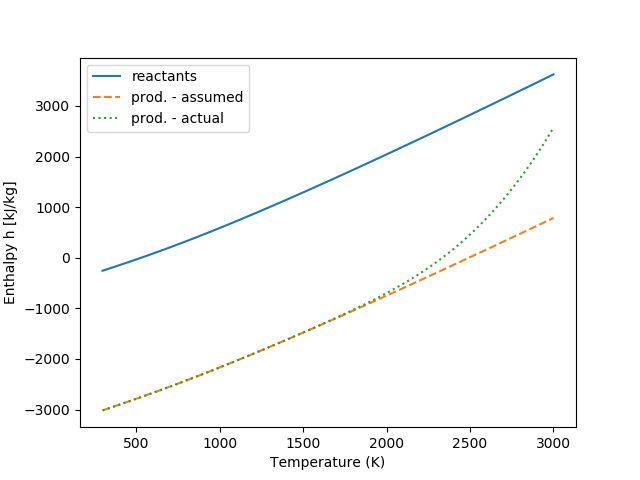

In [9]:
fig,ax = plt.subplots(1,1)
ax.plot(Ts, 1e-3*h_reac,label='reactants')
ax.plot(Ts, 1e-3*h_prod,'--',label='prod. - assumed')
ax.plot(Ts, 1e-3*h_equi,':',label='prod. - actual')

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Enthalpy h [kJ/kg]')
_ = ax.legend(loc='upper left')

<IPython.core.display.Javascript object>


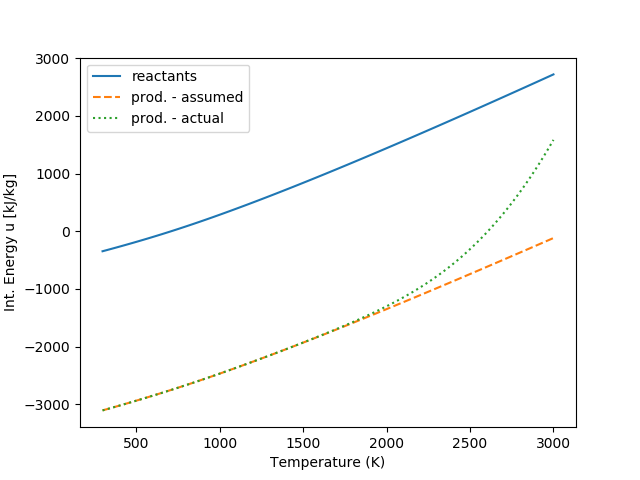

In [10]:
fig,ax = plt.subplots(1,1)
ax.plot(Ts, 1e-3*u_reac,label='reactants')
ax.plot(Ts, 1e-3*u_prod,'--',label='prod. - assumed')
ax.plot(Ts, 1e-3*u_equi,':',label='prod. - actual')

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Int. Energy u [kJ/kg]')
_ = ax.legend(loc='upper left')